# **Extração de Features**

In [71]:
import sys
import os

# Adiciona o diretório '../features' ao sys.path
features_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
sys.path.insert(1, features_path)

features_path

'c:\\Users\\lucca\\Desktop\\UFSCar\\PANDA\\grupo3-panda-redeneural-coinflip'

In [72]:
import pandas as pd

# Importando as features
from features import features_list

sequencias = pd.read_csv('sequencias-preprocessadas.csv')

colunas = [f.__name__ for f in features_list]

# Criando um novo dataframe com as features extraídas
features = pd.DataFrame(columns=colunas)

features

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F19


In [73]:
# Extraindo as features de cada sequência e adicionando no dataframe features
for f in features_list:
    col = sequencias['Sequências'].apply(f)
    features[f.__name__] = col

# Adicionando as classes ao dataframe features
features['Classe'] = sequencias['Classe']
    
features

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F19,Classe
0,1,20,30,3,3,30,1.250000,2.000000,3,0,17,0,16,15,17,0.970951,4,Humana
1,1,22,28,3,4,33,1.294118,1.647059,3,0,24,1,17,17,17,0.989588,5,Humana
2,0,26,24,6,4,26,1.857143,1.846154,2,0,17,2,14,13,18,0.998846,12,Aleatória
3,1,23,27,12,11,11,3.833333,4.500000,0,3,3,1,6,6,17,0.995378,17,Humana
4,0,31,19,5,3,25,2.384615,1.461538,1,0,12,2,13,13,17,0.958042,18,Aleatória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0,26,24,6,4,30,1.733333,1.500000,2,0,20,2,15,16,18,0.998846,11,Aleatória
1142,0,40,10,5,1,20,3.636364,1.000000,0,0,11,4,11,10,15,0.721928,29,Humana
1143,0,27,23,6,4,25,2.076923,1.769231,3,0,17,2,13,13,17,0.995378,14,Humana
1144,0,28,22,5,4,27,2.000000,1.571429,3,0,19,1,14,14,17,0.989588,14,Humana


In [74]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1146 non-null   int64  
 1   F2      1146 non-null   int64  
 2   F3      1146 non-null   int64  
 3   F4      1146 non-null   int64  
 4   F5      1146 non-null   int64  
 5   F6      1146 non-null   int64  
 6   F7      1146 non-null   float64
 7   F8      1146 non-null   float64
 8   F9      1146 non-null   int64  
 9   F10     1146 non-null   int64  
 10  F11     1146 non-null   int64  
 11  F12     1146 non-null   int64  
 12  F13     1146 non-null   int64  
 13  F14     1146 non-null   int64  
 14  F15     1146 non-null   int64  
 15  F16     1146 non-null   float64
 16  F19     1146 non-null   int64  
 17  Classe  1146 non-null   object 
dtypes: float64(3), int64(14), object(1)
memory usage: 161.3+ KB


In [75]:
# Removendo duplicatas
def removeDupes(df):
    qtd = df.shape
    
    df = df.drop_duplicates().reset_index(drop=True)
    
    loss = qtd[0] - df.shape[0]

    print(f'Quantidade original: {qtd[0]}')
    print(f'Quantidade atual: {df.shape[0]} - Loss: {loss} ({(loss) /  (qtd[0]) * 100:.2f}%)')
    
    return df

features = removeDupes(features)

Quantidade original: 1146
Quantidade atual: 1139 - Loss: 7 (0.61%)


Verificando se o balanceamento se mantém após a remoção de duplicatas

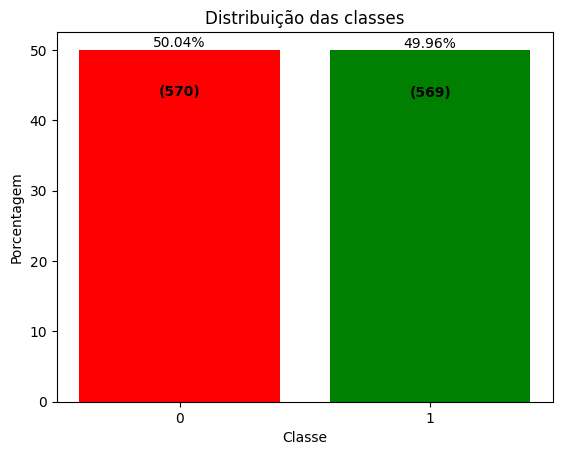

In [76]:
import matplotlib.pyplot as plt

def balanceamento(data, coluna):
    # Verificando balanceamento das classes
    distribuicao = data[coluna].value_counts(normalize=True) * 100

    plt.bar(distribuicao.index, distribuicao.values, color=['red', 'green'])
    plt.xlabel(coluna)
    plt.ylabel('Porcentagem')
    plt.title('Distribuição das classes')
    for i, value in enumerate(distribuicao.values):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
        plt.text(i, value-5, f'({data[coluna].value_counts()[i]})', ha='center', va='top', fontweight='bold')

    plt.xticks(range(len(distribuicao.index)), ['0', '1'])
    plt.show()

balanceamento(features, 'Classe')

In [77]:
# Exportando o dataset
features.to_csv('features.csv', index=False)